In [1]:
import datetime
import json
import os
import sys
import time
import re
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from bs4 import BeautifulSoup
import numpy as np
from baseball_scraper import pitching_stats_bref
from baseball_scraper import batting_stats_bref

/anaconda2/envs/py36/lib/python3.6/site-packages/bs4/element.py:16: UserWarning: The soupsieve package is not installed. CSS selectors cannot be used.
  'The soupsieve package is not installed. CSS selectors cannot be used.'


In [2]:
sys.path.append("..")
pitch_path  = '../baseball2020/bref_seasons/pitching/'  
bat_path  = '../baseball2020/bref_seasons/batting/' 
call = 'gotime'

In [3]:
def main():
    start_time = time.time()
    if call.startswith('gotime'):
        pitch_looper()
        bat_looper()
    else:
        print('this failed')
    elapsed = time.time() - start_time
    print('Elapsed time: %s' % format_seconds(elapsed))
    
def pitch_fetcher(year):
    filename = pitch_path + 'pitching_data' + str(year) + '.csv'
    year_pitching = pitching_stats_bref(year)
    pitching_df = pd.DataFrame(year_pitching) 
    pitching_df['season']=year
    pitching_df.to_csv(filename, index=False)
    return pitching_df

def pitch_looper(): 
    years = [2015,2016,2017,2018,2019]
    for year in years:
        pitch_fetcher(year)
        print('fetching data...')
        
def bat_fetcher(year):
    filename = bat_path + 'batting_data' + str(year) + '.csv'
    year_batting = batting_stats_bref(year)
    batting_df = pd.DataFrame(year_batting) 
    batting_df['season']=year
    batting_df.to_csv(filename, index=False)
    return batting_df

def bat_looper(): 
    years = [2015,2016,2017,2018,2019]
    for year in years:
        bat_fetcher(year)
        print('fetching data...')

def format_seconds(seconds):
    if seconds > 60:
        minutes, seconds = seconds // 60, seconds % 60
        return '%d:%02.2f minutes' % (minutes, seconds)
    return '%.2f seconds' % seconds

if __name__ == '__main__':
    main()

fetching data...
fetching data...
fetching data...
fetching data...
fetching data...
fetching data...
fetching data...
fetching data...
fetching data...
fetching data...
Elapsed time: 2:4.89 minutes


In [4]:
#load all of your files into two data frames
import glob
pitch_files = glob.glob(os.path.join(pitch_path, "*.csv"))
pitching = pd.concat((pd.read_csv(f) for f in pitch_files))
bat_files = glob.glob(os.path.join(bat_path, "*.csv"))
batting = pd.concat((pd.read_csv(f) for f in bat_files))

In [5]:
#see how big your new datafram is, take a look at the data
len(pitching)

3862

In [6]:
pitching.head()

,Name,Age,#days,Lev,Tm,G,GS,W,L,SV,...,StL,StS,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W,season
0,Fernando Abad,33,143,MLB-NL,San Francisco,21,0,NaN,2.0,NaN,...,0.25,0.11,0.62,0.19,0.03,0.923,0.200,6.2,3.00,2019
1,Bryan Abreu,22,142,MLB-AL,Houston,7,0,NaN,NaN,NaN,...,0.19,0.19,0.50,0.31,0.00,0.808,0.250,13.5,4.33,2019
2,Jason Adam,27,142,MLB-AL,Toronto,23,0,3.0,NaN,NaN,...,0.13,0.11,0.29,0.24,0.18,1.154,0.237,7.5,1.80,2019
3,Austin Adams,32,227,MLB-AL,"Minnesota,Detroit",15,0,NaN,NaN,NaN,...,0.14,0.11,0.42,0.21,0.09,1.860,0.286,7.6,1.08,2019
4,Austin Adams,28,150,"MLB-AL,MLB-NL","Seattle,Washington",30,2,2.0,2.0,NaN,...,0.18,0.16,0.50,0.18,0.05,1.125,0.286,14.9,3.31,2019


In [8]:
#create a subset of pitching data for 2019, then select only pitchers with at least 15 games started, 
#confirm by looking at the first few rows
pitching_2019 = pitching[pitching['season'] == 2019]
pitching_2019 = pitching_2019[pitching_2019['GS'] > 14]
pitching_2019.head()

,Name,Age,#days,Lev,Tm,G,GS,W,L,SV,...,StL,StS,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W,season
12,Sandy Alcantara,23,142,MLB-NL,Miami,32,32,6.0,14.0,NaN,...,0.15,0.11,0.45,0.23,0.07,1.318,0.274,6.9,1.86,2019
25,Brett Anderson,31,143,MLB-AL,Oakland,31,31,13.0,9.0,NaN,...,0.17,0.08,0.55,0.24,0.04,1.302,0.280,4.6,1.84,2019
26,Chase Anderson,31,145,MLB-NL,Milwaukee,32,27,8.0,4.0,NaN,...,0.15,0.11,0.34,0.23,0.12,1.266,0.270,8.0,2.48,2019
31,Shaun Anderson,24,144,MLB-NL,San Francisco,28,16,3.0,5.0,2.0,...,0.14,0.09,0.41,0.32,0.07,1.552,0.327,6.6,1.84,2019
37,Chris Archer,30,182,MLB-NL,Pittsburgh,23,23,3.0,9.0,NaN,...,0.17,0.13,0.36,0.31,0.07,1.412,0.304,10.8,2.60,2019


count    146.000000
mean       8.728767
std        1.786808
min        4.600000
25%        7.400000
50%        8.700000
75%        9.875000
max       13.800000
Name: SO9, dtype: float64


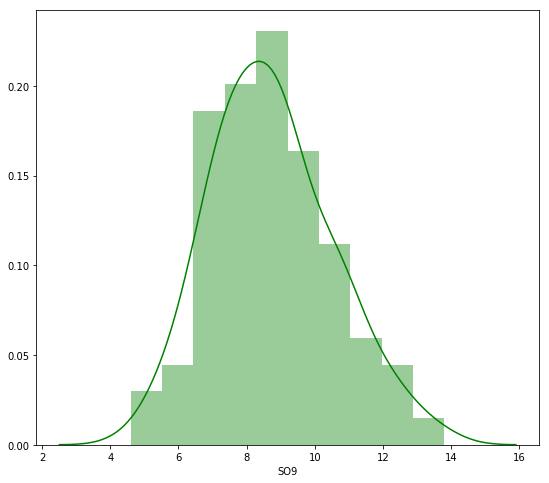

In [10]:
#Take a look at the distribution and summary statistics for a single variable
print(pitching_2019['SO9'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(pitching_2019['SO9'], color='g', bins=10, hist_kws={'alpha': 0.4});

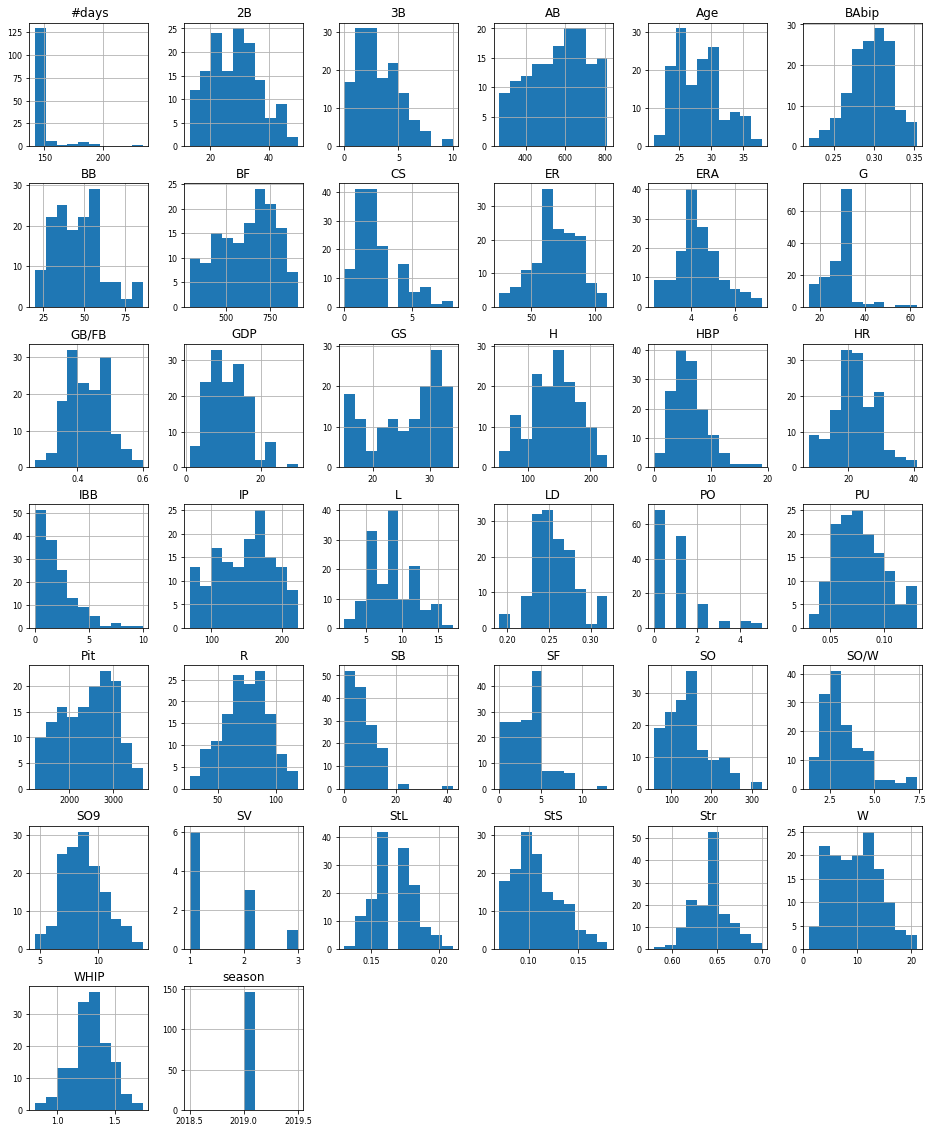

In [11]:
#look at histograms for ALL variables
pitching_2019.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8);